In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
df_train = pd.read_csv('C:/Users/Harika/Documents/Hackathon/American_express/train.csv')
df_test = pd.read_csv('C:/Users/Harika/Documents/Hackathon/American_express/test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              590 non-null object
Age               590 non-null object
Debt              590 non-null float64
Married           590 non-null object
BankCustomer      590 non-null object
EducationLevel    590 non-null object
Ethnicity         590 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           590 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 78.4+ KB


In [4]:
df_train.describe()

,Key,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,4.609390,2.088534,2.045763,918.706780
std,170.462606,4.849569,3.198681,3.702375,5025.415369
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,1.000000,0.165000,0.000000,0.000000
50%,295.500000,2.710000,1.000000,0.000000,4.000000
75%,442.750000,7.000000,2.500000,2.000000,363.000000
max,590.000000,26.335000,20.000000,20.000000,100000.000000


In [5]:
df_train = df_train.replace('?', np.nan)

#df_test = df_test.replace('?', np.nan)

In [6]:
df_train.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,NaN,26.5,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80,0,-


In [7]:
#Checking for missing values percentage
percent_missing = (((df_train.isnull() | df_train.isna()).sum() * 100 / df_train.index.size).sort_values(ascending=False))
print(percent_missing.to_string())

ZipCode           2.203390
Age               2.033898
Male              1.864407
Ethnicity         1.525424
EducationLevel    1.525424
Married           1.016949
BankCustomer      1.016949
Approved          0.000000
Debt              0.000000
YearsEmployed     0.000000
Income            0.000000
PriorDefault      0.000000
Employed          0.000000
CreditScore       0.000000
DriversLicense    0.000000
Citizen           0.000000
Key               0.000000


In [8]:
#Checking for missing values percentage
percent_missing = (((df_test.isnull() | df_test.isna()).sum() * 100 / df_test.index.size).sort_values(ascending=False))
print(percent_missing.to_string())

Income            0.0
ZipCode           0.0
Citizen           0.0
DriversLicense    0.0
CreditScore       0.0
Employed          0.0
PriorDefault      0.0
YearsEmployed     0.0
Ethnicity         0.0
EducationLevel    0.0
BankCustomer      0.0
Married           0.0
Debt              0.0
Age               0.0
Male              0.0
Key               0.0


In [9]:
df_train = df_train.dropna()

In [10]:
mode_value = df_test['Male'].mode()

#df_test['Male'] = df_test['Male'].fillna(mode_value)
df_train['Male'] = df_train['Male'].map({'?' : mode_value})

In [11]:
mode_value

0    b
dtype: object

In [12]:
df_train['Approved'].value_counts()

-    333
+    221
Name: Approved, dtype: int64

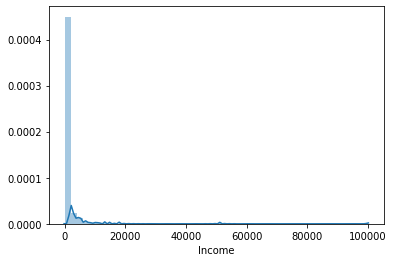

In [13]:
sns.distplot(df_train['Income'])

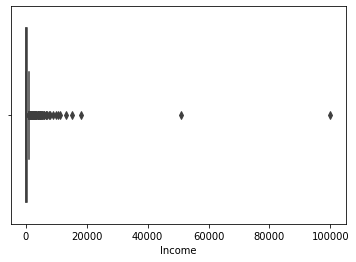

In [14]:
sns.boxplot(x=df_train['Income'])

In [15]:
q = df_train["Income"].quantile(0.95)
q

4000.0

In [16]:
df_train = df_train[df_train["Income"] < q]

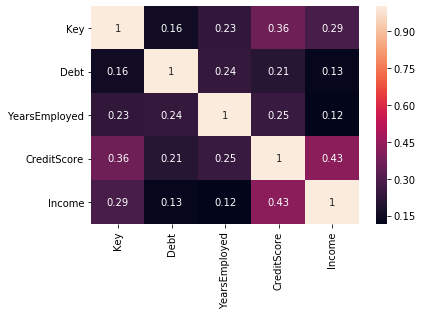

In [17]:
#checking the correlation
plt.figure()
sns.heatmap(df_train.corr(),annot = True)
plt.show()

In [18]:
df_train = df_train.drop(['Key', 'ZipCode'], axis=1 )
df_cat = df_train.select_dtypes('object')

df_test1 = df_test.copy()

df_test = df_test.drop(['Key', 'ZipCode'], axis=1 )

In [19]:
for col in df_cat:
    print(col)
    print(df_cat[col].nunique())

Male
0
Age
302
Married
3
BankCustomer
3
EducationLevel
14
Ethnicity
9
PriorDefault
2
Employed
2
DriversLicense
2
Citizen
3
Approved
2


In [20]:
df_train.dtypes

Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
Income              int64
Approved           object
dtype: object

In [21]:
df_train['Age'] = pd.to_numeric(df_train['Age'])
df_train.Age = df_train.Age.round()
df_train['Age'] = df_train['Age'].astype(int)

df_test['Age'] = pd.to_numeric(df_test['Age'])
df_test.Age = df_test.Age.round()
df_test['Age'] = df_test['Age'].astype(int)

In [22]:
df_train['Approved'] = df_train['Approved'].map({'+': 1, '-': 0})

In [23]:
#df_train = pd.get_dummies(df_train, columns=['Male', 'Married', 'BankCustomer','EducationLevel',
#                    'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen'], drop_first=True)

#df_test = pd.get_dummies(df_test, columns=['Male', 'Married', 'BankCustomer','EducationLevel',
#                    'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen'], drop_first=True)

In [24]:
X = df_train.drop(['Approved'], axis = 1)
y = df_train['Approved']

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = X.apply(le.fit_transform)

df_test = df_test.apply(le.fit_transform)

In [26]:
X.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
8,0,25,97,1,0,2,7,100,1,0,0,1,0,0
9,0,5,19,2,2,0,7,15,1,0,0,1,0,0
10,0,14,44,1,0,9,7,43,1,0,0,0,2,0
12,0,35,44,1,0,7,4,0,1,0,0,1,0,25
13,0,15,79,1,0,6,0,13,1,0,0,1,0,0


In [27]:
X.shape

(525, 14)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [29]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()
df_test_scale = df_test.copy()

In [30]:
#Scaling the data
scaler = StandardScaler()
variables = X_train.select_dtypes(include =['float64', 'int64'])
var_cols = variables.columns
X_train[var_cols] = scaler.fit_transform(X_train[var_cols])
#scaled_train = scaler.fit_transform(X_train)

#scaled_train = pd.DataFrame(scaled_train, columns = X_train1.columns)

In [31]:
#Scaling the data
scaler = StandardScaler()
variables = X_test.select_dtypes(include =['float64', 'int64'])
var_cols = variables.columns
X_test[var_cols] = scaler.fit_transform(X_test[var_cols])
#scaled_test = scaler.fit_transform(X_test)

#scaled_test = pd.DataFrame(scaled_test, columns = X_test1.columns)

In [32]:
scaler = StandardScaler()

variables = df_test.select_dtypes(include =['float64', 'int64'])
var_cols = variables.columns
df_test[var_cols] = scaler.fit_transform(df_test[var_cols])

#scaled_pred = scaler.fit_transform(df_test)

#scaled_pred = pd.DataFrame(scaled_pred, columns = df_test_scale.columns)

In [33]:
#Using Logistic regression model to train the data
logreg = LogisticRegression()
logreg.fit(scaled_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logreg.predict(scaled_test)
y_pred_proba = logreg.predict_proba(scaled_test)[:, 1]
y_pred = pd.DataFrame(y_pred)

In [35]:
accuracy_score(y_test, y_pred)

0.8924050632911392

In [36]:
f1_score(y_test, y_pred)

0.8682170542635659

In [37]:
recall_score(y_test, y_pred)

0.8888888888888888

In [38]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[85, 10],
       [ 7, 56]], dtype=int64)

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False )

In [40]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

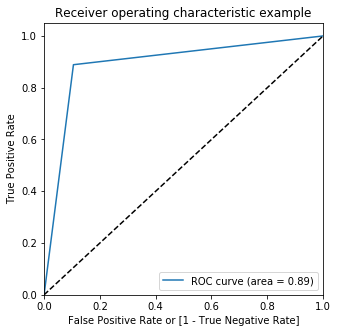

In [41]:
draw_roc(y_test, y_pred)

In [64]:
predictions = logreg.predict(scaled_pred)
predictions_proba = logreg.predict_proba(scaled_pred)[:, 1]

In [65]:
pred_final = pd.DataFrame({'Approved':predictions})
pred_final['Key'] = df_test1['Key']
pred_final = pred_final[['Key', 'Approved']]
pred_final['Approved'] = pred_final['Approved'].map({1 : '+', 0 : '-'})
pred_final.head()

,Key,Approved
0,1,-
1,2,-
2,3,-
3,4,-
4,5,-


In [68]:
pred_final.to_csv('C:/Users/Harika/Documents/Hackathon/American_express/Amex_3.csv', index=False)

In [69]:
pred_final['Approved'].value_counts()

-    55
+    45
Name: Approved, dtype: int64

In [46]:
# train model
rfc = RandomForestClassifier().fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

In [47]:
accuracy_score(y_test, rfc_pred)

0.8544303797468354

In [48]:
f1_score(y_test, rfc_pred)

0.7927927927927927

In [49]:
recall_score(y_test, rfc_pred)

0.6984126984126984

In [50]:
cm=confusion_matrix(y_test, rfc_pred)
cm

array([[91,  4],
       [19, 44]], dtype=int64)

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred, drop_intermediate = False )

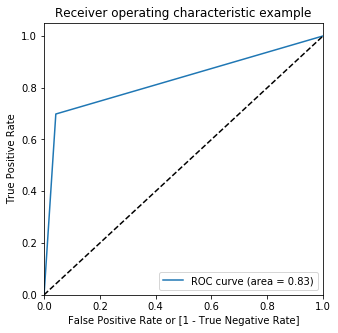

In [52]:
draw_roc(y_test, rfc_pred)

In [53]:
predictions_rfc = rfc.predict(df_test)
predictions_proba_rfc = rfc.predict_proba(df_test)[:, 1]

In [54]:
rfc_pred = pd.DataFrame({'Approved':predictions})
rfc_pred['Key'] = df_test1['Key']
rfc_pred = rfc_pred[['Key', 'Approved']]
rfc_pred['Approved'] = rfc_pred['Approved'].map({1 : '+', 0 : '-'})
rfc_pred.head()

,Key,Approved
0,1,-
1,2,+
2,3,+
3,4,-
4,5,+


In [55]:
rfc_pred['Approved'].value_counts()

+    98
-     2
Name: Approved, dtype: int64